# **Machine Learning for CCS 25/26**
## **Assignment 1: The Machine Learning Life Cycle and Feature Selection**

Welcome to the first assignment of the course! This notebook will guide you through an engaging exploration of the machine learning life cycle, using a dataset you’ve encountered in this week’s suggested readings. The goal is to give you hands-on experience with feature engineering, model training, and evaluation.

### **Learning Objectives**
By completing this assignment, you will:
- Learn how to extract meaningful features from raw eye-tracking data.
- Practice splitting data into training, validation, and test sets.
- Experiment with training various machine learning models.
- Analyze and discuss the generalization ability of your models.

### **Your Tasks**
You will implement and reflect on the following steps:

1. **Feature Engineering:** Extract and compute different features from the provided eye-tracking data.   
2. **Data Splitting:** Experiment with various strategies for dividing data into training, validation, and test sets. 
3. **Model Training:** Train different machine learning models and compare their performance.  
4. **Generalization Exploration:** Evaluate how well the models generalize to unseen data and discuss your findings. 

### **Notebook Structure**
This notebook contains:
- Explanations to provide context and guidance.
- Clearly marked tasks for you to complete.
- Pre-written code snippets to help you get started.

### **Assessment**
Each task is assigned a specific number of points, indicated alongside its description. Focus on demonstrating your understanding through well-documented code, thorough analysis, and insightful discussions.


### *Imports*
For this assignment we recommend using the following packages. In the first step, import them: 
- numpy (import as np)
- pyplot from matplotlib (import as plt)
- pandas as pd 

Remember, if you are working in a new or virtual environment, you might have to install the packages you want to use first. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **Loading the Data**

In this section, we will load and visually inspect the dataset we'll be working with. The data comes from the paper *"Imaging Time Series of Eye Tracking Data to Classify Attentional States"* and is referred to as the **"switch" dataset**. This dataset was originally presented in **Annerer-Walcher et al. (2021)** and is publicly available through the Open Science Framework (OSF).

For this assignment, we will focus on data from **two participants** from the original dataset.

#### **Steps to Download the Data**
Follow these instructions to download and prepare the data:
1. Locate the **Data Availability Statement** in the original paper from Annerer-Walcher et al. (2021) and follow the provided link.
2. Navigate to the **Data** folder and then into the **"Preprocessed Data"** subfolder. Next, extend the OSF Storage to see the subfolder **Preprocessed data per participant**.
3. You will find a list of participant datasets, identifiable by their individual pseudonyms in the beginning of the file names.
4. Download the files for participants **"aa03l"** and **"AA30W"**.
5. Save the `.csv` files for these participants in a folder named `data` within your project directory.

#### **Next Steps**
In the following code cell:
1. Use `pandas` to import the data for both participants.
2. Print the first few rows (`head`) of the dataset for participant **"aa03l"** to visually inspect its structure.


In [2]:
data_p1 = pd.read_csv("", sep = ";")
data_p2 = pd.read_csv("", sep = ";")

pd.set_option('display.max_columns', None)
data_p1.head()

FileNotFoundError: [Errno 2] No such file or directory: ''

### **Data Exploration (Ungraded)**

The dataset you are working with has already been preprocessed, including:
- The combination of separately recorded blocks.
- Outlier detection and removal.

You do not need to worry about preprocessing for this assignment. If you are interested in the preprocessing details, you can refer to the original paper for more information.

#### **Exploration Suggestions**
Take some time to explore the data to familiarize yourself with its structure and contents. You can decide how much you want to explore the second participant’s data or compare the two participants at this stage. For a detailed description of the dataset's columns, refer to the documentation here: [OSF Dataset Description](https://osf.io/uf2sp).

To assist with your exploration, here are some useful `pandas` functions:
- **`.describe()`**: Provides summary statistics for numerical columns.
- **`.describe(include=object)`**: Summarizes non-numerical columns (e.g., object types).
- **`.value_counts()`**: Displays the frequency of unique values in a column.
- **`.min()` and `.max()`**: Find the minimum and maximum values in a column.

Feel free to use these or any other methods you find helpful to get a better understanding of the data.

#### **Goal**
The goal of this step is for you to gain insight into the dataset before diving into feature extraction and model training. You are encouraged to document your observations or any patterns you notice as they might be useful later in the assignment.


In [ ]:
# Example 
data_p1['micros'].value_counts()

micros
1.0    1172
Name: count, dtype: int64

### **Data Exploration with Grouped Samples**

The dataset consists of data recorded across different trials, where tasks varied, and the attentional focus was directed either **internally** or **externally**. Later in the Machine Learning part, your goal will be to achieve the highest possible classification accuracies for the following two tasks:

1. **Classify tasks based on attentional focus:**
   - **Internal** vs. **External** attention.

2. **Classify tasks based on the type of task:**
   - **Animals**, **Imagination**, **Mental Arithmetic**, **Number Comparison**, **Search**, and **Word Generation**.

#### **Exploration Suggestions**
To prepare for these classification tasks, it may be helpful to explore the data by grouping samples. This can provide insights into how the features differ based on the focus or task type. 

The following `pandas` function will be useful:
- **`.groupby()`**: Allows you to group the data based on a specific column (e.g., focus or task) and compute aggregated statistics for each group.

#### **What to Explore**
- Compare summary statistics (e.g., means, medians) of features for internal vs. external focus.
- Explore how features vary across the different task types.
- Identify patterns or imbalances in the data that might affect classification.

Feel free to use `.groupby()` in combination with other functions like `.mean()`, `.std()`, `.count()`, or `.describe()` to uncover meaningful patterns in the data.

#### **Goal**
This exploration step will help you understand the structure of the data within and across groups, which is key for feature engineering and model optimization in later tasks.


In [ ]:
# Example: 
data_p1.groupby(["task"])["pupil"].describe(include=object)

,count,mean,std,min,25%,50%,75%,max
task,,,,,,,,
Animals,49664.0,3.247099,0.169487,2.86,3.12,3.23,3.36,3.90
Imagination,49788.0,3.443463,0.192164,2.92,3.32,3.43,3.54,4.06
Mentalarithmetic,47317.0,3.327905,0.231005,2.84,3.18,3.29,3.42,4.06
Numbercomparison,49842.0,3.274026,0.159780,2.86,3.16,3.27,3.38,3.72
Search,48081.0,3.390693,0.166292,3.00,3.28,3.38,3.48,4.06
Wordgeneration,48078.0,3.543771,0.216799,2.84,3.41,3.56,3.69,4.06


You can also explore the data using some visualizations using `pyplot`! Anything you can think of to get a better understanding of the data to help you decide which features to use. 

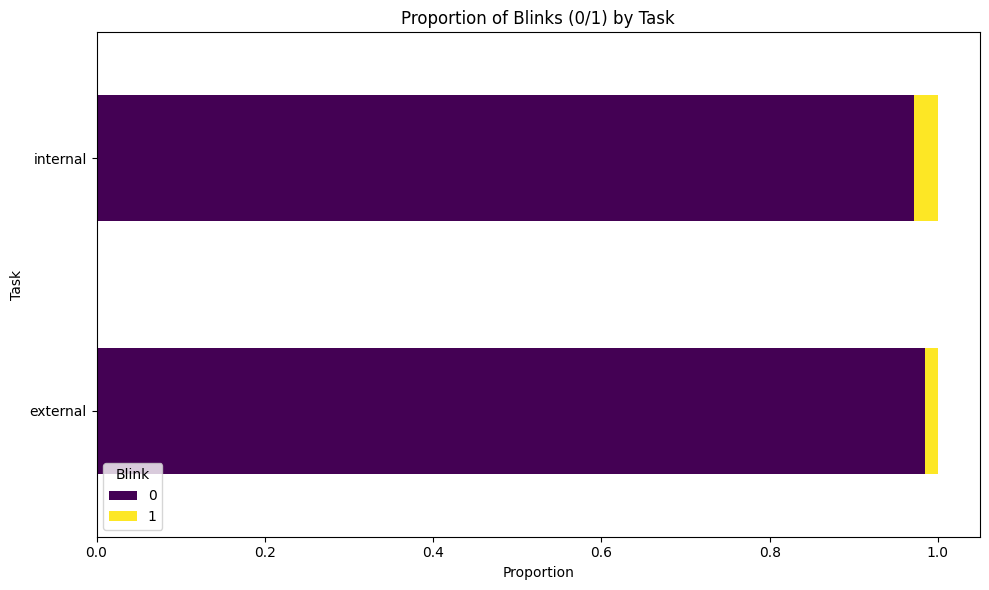

In [ ]:
# Example 
grouped_data = data_p1.groupby(['focus'])['blink'].value_counts()

grouped_data = grouped_data.reset_index(name='count')
grouped_data['proportion'] = grouped_data['count'] / grouped_data.groupby('focus')['count'].transform('sum')

pivoted = grouped_data.pivot(index='focus', columns='blink', values='proportion')

fig, ax = plt.subplots(figsize=(10, 6))
pivoted.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')
ax.set_xlabel('Proportion')
ax.set_ylabel('Task')
ax.set_title('Proportion of Blinks (0/1) by Task')
plt.legend(title='Blink', loc='lower left')
plt.tight_layout()
plt.show()


Now that the data has been preprocessed and you have a clear understanding of its structure, we can dive straight into feature extraction.

---

### **1. Feature Extraction (Total: 10 Points)**

In this exercise, you will focus on creating features that capture **statistical summaries of eye gaze behavior**. These features may include (but are not limited to):
- Fixations
- Saccades
- Pupil dilation
- Any additional properties you find relevant

How you define and compute these features is entirely up to you. This is your opportunity to be creative and think about meaningful ways to represent the data.

#### **Task 1a (5 Points): Generate Your Feature Vector**
Use the following code block to complete the tasks below:
1. Develop methods to generate features describing **different properties per trial**.
2. Ensure your final output is:
   - An array of dimensions **n × m**, where:
     - **n** = number of trials for this participant.
     - **m** = number of features.
   - A list describing each feature in the correct order. For example, if the first column in your array represents the total number of fixations per trial, the first item in your list should be `"number_fixations"`.
3. Turn your feature extraction into a reusable **function**:
   - Input: Participant's data.
   - Output: Feature array (`n × m`) and the corresponding feature descriptions list.
4. Use the next cell to run this function for both participants.

#### **Guidelines**
- Comment on your code to clearly explain what each step is doing.
- Calculate at least 10 different features
- Think about how these features might be useful for classification tasks later.


### **Expected Outcome**
By the end of this task, you should have:
- A feature matrix (`n × m`) for each participant.
- A corresponding list of feature descriptions.

This step lays the foundation for building and training machine learning models in the subsequent sections.


In [ ]:
def feature_generation(data):
    ### skeleton for your final funtion. 
    # Tips: 1. You can add another code block to test out your feature generation first. 
    #       2. It probably makes sense to define more functions for the individual features you are generating but this is up to you. you could use these funtions inside this function. 
    return features, feature_names

In [ ]:
features_p1, feature_names = feature_generation(data_p1)
features_p2, _ = feature_generation(data_p2)


### **Task 1b (3 Points): Reflection on Feature Selection**

In this task, you will explain how your data exploration informed your choices for feature selection and generation. Reflect on the following points in your response:

1. **Connection to Data Exploration:**
   - Describe how your initial exploration of the dataset guided you in selecting and creating features. 
   - Mention any patterns, trends, or differences you observed (e.g., between tasks or attentional focus) that influenced your decisions.

2. **Rationale for Selected Features:**
   - Explain why you chose the specific features you generated (e.g., fixations, saccades, pupil dilation).
   - Discuss the relevance of these features for the classification tasks.

3. **Feature Quantity:**
   - Comment on the number of features you generated:
     - Do you think you have **too few**, **too many**, or the **right amount**?
     - What are the potential impacts of too few or too many features on your machine learning algorithm? For example:
       - Too few features might result in underfitting.
       - Too many features might lead to overfitting or increased computational complexity.

Use this reflection to critically assess your feature extraction process and its implications for the upcoming classification tasks.


### **Expected Outcome**
Your explanation should provide clear reasoning for your feature engineering decisions and demonstrate an understanding of the trade-offs between simplicity and complexity in machine learning.


*Double click here to enter your discussion*

### **Task 1c (2 Points): Reflection on Explicitly Defined Features**
As per the lecture, explain the advantages and disadvantages of these explicitly defined features and describe possible alternatives.

*Double click here to enter response*

---

### **2. Classification (Total: 10 Points)**

In this section, you will train and test classifiers using the features extracted earlier. The goal is to predict trial-level labels based on the generated features.

#### **Overview**
Now that you have your features, you also need the corresponding **labels** for classification. As described earlier, this dataset supports two classification tasks:
1. **Focus Classification:** Predict whether the attentional focus was **internal** or **external** for each trial.
2. **Task Classification:** Predict the task type for each trial (**Animals**, **Imagination**, **Mental Arithmetic**, **Number Comparison**, **Search**, **Word Generation**).

To simplify the workflow later, you will generate the labels for both classification tasks in this step:
- Ensure you have **one label per trial**.
- Generate two label vectors:
  1. **Focus Labels:** For internal vs. external attention.
  2. **Task Labels:** For task type.

Use clear variable names to distinguish the two label vectors. Below, you find the basic setup for this. Notice that we need to transform categorical variables into numerical ones for later.


In [ ]:
# import label encoder
from sklearn import preprocessing 

# make an instance of Label Encoder
label_encoder = preprocessing.LabelEncoder()

# Extract and transform labels
labels_focus_p1 = data_p1.groupby(['TrialNr'])['focus'].first().values
labels_focus_p1 = label_encoder.fit_transform(labels_focus_p1)

#labels_focus_p2 = 

#labels_task_p1 =
#labels_task_p2 = 

### **Task 2a (3 Points): Training and Testing a Classifier for Focus Classification**

The code skeleton provided below outlines the basic structure for training and testing a classifier. Your goal is to complete the code to train a classifier that can distinguish the **focus** of the trials (internal vs. external attention) for **Participant 1**.
Complete the code and describe your initial results below. Include key takeaways from the confusion matrix and classification report. Reflect on the results:  
- Were the predictions accurate for both focus classes (internal and external)?
- Did the classifier perform better on one class than the other?
- Consider possible reasons for the observed performance and potential improvements (e.g., additional features or a different classifier).  

**Expected Outcome**  
By the end of this task, you will:  

- Have a trained classifier for focus classification on Participant 1's data.
- Gain insights into its performance and identify areas for improvement.

In [ ]:
# Add the import of the classification algorithms you would liek to test. We suggest sticking with sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Assuming features_p1 is (trials x features) and labels_focus_p1 is a 1D array
# Convert to numpy arrays if necessary
X =  # Features (trials x features)
y =  # Labels (trials,)


## We can k-fold this!!
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a basic classifier. Which classifier is up to you. Ex: Random forest, LDA
classifier = 
classifier.fit()

#  Make predictions on the test set
y_pred = 

#  Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

#  Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

*Enter the description of your initial results here*

--

### **Task 2b (3 Points): Adding Crucial Concepts**

The code above is missing a few crucial concepts that were covered in the lecture. Your task is to integrate these concepts into the code in the appropriate places. Then, explain below why each addition is important and describe your updated results.

#### **Concepts to Add**
1. **Normalization of the Features:**
   - Ensure the features are normalized (e.g., using `StandardScaler`) 
2. **Using a Validation Set:**
   - Incorporate a validation set during the training process.

3. **Stratifying the Train-Test Split and Setting a Random State:**
   - Stratify the split to maintain the same proportion of labels in the training and test sets (using the `stratify` parameter)
   - Set a random state

**Expected Outcome**  
After completing this task, you should:
1. Understand the importance of normalization, validation sets, stratification, and random states.
2. Be able to interpret how these improvements affect model performance and reliability.



*Enter the explanation of the additional concepts here*

*Enter the description of the new results here*

### **Task 2c (3 Points): Compare different models** 
Next, we want to compare the different datasets and classification tasks. 
1. Copy your code from above into the code cell below. You will now be working with that. It will not be graded once handed in and you can use it to generate the results. 
2. In the markdown cell below the code block, report and discuss the following results: 
* Classification results of "focus" from participant 1 using at least one other classifier.
* Classification results of "focus" from participant 2 with the better performing classifier of the tested ones. 
* Classification results of "task" from participant 1 and 2. Discuss these results with regard to how the chance level has changed. 

In [ ]:
# insert code here

*Enter description of results and discussion here*

### **Task 2d (1 Point): Generalization.** 
There are many ways to test how well a model is able to generalize. Here, we want to test generalization over participants. In the code cell below, train your best performing classifier from the focus classification on all data of participant 1 and test the predictions made on the data of participant 2, and vice versa. Report below.

In [ ]:
# Enter code here

*Enter report here*

**Bonus Question (0.5 points):**  
For the task classifier, what would be other ways to test generalization of your model? Explain how this relates to internal or external validity. 

*Enter your response here*

---

### **Conclusion**

Great work on completing this assignment! You’ve now had hands-on experience with:
- Exploring and preprocessing a real-world dataset.
- Extracting meaningful features for machine learning tasks.
- Training and evaluating classifiers for focus and task classification.

Remember, machine learning is an iterative process. The insights you’ve gained here will serve as a strong foundation for tackling more complex datasets and tasks in the future. Keep experimenting, refining, and learning!

If you have any questions or want to discuss your results, feel free to reach out during office hours or discuss with your classmates.
